# Flow Analysis: EDH vs LEDH vs Matrix Kernel PFF

This notebook runs experiments comparing particle flow filters with focus on:
- **Localization effect** in Kernel PFF (Hu 2021, Eqs. 28-29)
- **Linear vs Nonlinear** models
- **Full vs Partial** observations

## Experiments

| # | Model | Observations | Kernel PFF Localization | Expected Winner |
|---|-------|--------------|------------------------|------------------|
| 1 | LGSSM 20D | 100% | ON | EDH/LEDH (exact) |
| 2 | LGSSM 20D | 20%, 10% | ON | Unclear |
| 3 | LGSSM 20D | 20%, 10% | OFF | EDH/LEDH (KPFF can't communicate) |
| 4 | Range-Bearing | 50% (2/4) | ON | Unclear |
| 5 | Range-Bearing | 50% (2/4) | OFF | EDH/LEDH (KPFF unstable) |

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng
import sys
sys.path.insert(0, '..')

from filter_comparison import (
    run_experiment_1,
    run_experiment_2,
    run_experiment_3,
    run_experiment_4,
    run_experiment_5,
    run_all_experiments,
)

# Plot settings
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 11
COLORS = {'EDH': 'C0', 'LEDH': 'C1', 'KernelPFF_loc': 'C2', 'KernelPFF_no_loc': 'C3'}

## Experiment 1: Full Observation LGSSM

**Setup**: 20D state, 100% observed (linear Gaussian)

**Expected**: EDH and LEDH should win — they are exact for linear Gaussian models.

In [5]:
results_exp1 = run_experiment_1(n_particles=40, T=20, n_trajectories=5, seed=42)


EXPERIMENT 1: Full Observation LGSSM (20D, 100% observed)
Expected: EDH/LEDH win (exact for linear Gaussian)
  Trajectory 1/5 - Done
  Trajectory 2/5 - Done
  Trajectory 3/5 - Done
  Trajectory 4/5 - Done
  Trajectory 5/5 - Done

Experiment 1: Full Observation LGSSM
Filter                    |             RMSE |        Runtime
----------------------------------------------------------------------
EDH                       | 0.2782 ± 0.0172 | 0.034 ± 0.005s
LEDH                      | 0.2766 ± 0.0167 | 1.157 ± 0.017s
KernelPFF_loc             | 0.2810 ± 0.0162 | 0.886 ± 0.012s


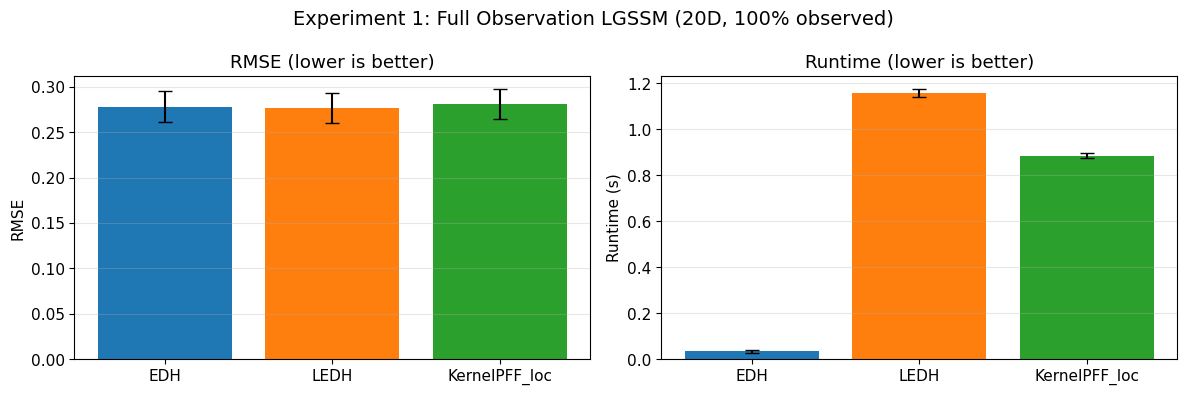

In [6]:
def plot_rmse_runtime(results, title):
    """Bar chart of RMSE and Runtime."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    names = list(results.keys())
    x = np.arange(len(names))
    
    # RMSE
    rmses = [results[n].rmse_mean for n in names]
    rmse_stds = [results[n].rmse_std for n in names]
    colors = [COLORS.get(n, 'gray') for n in names]
    axes[0].bar(x, rmses, yerr=rmse_stds, color=colors, capsize=5)
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(names)
    axes[0].set_ylabel('RMSE')
    axes[0].set_title('RMSE (lower is better)')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Runtime
    runtimes = [results[n].runtime_mean for n in names]
    runtime_stds = [results[n].runtime_std for n in names]
    axes[1].bar(x, runtimes, yerr=runtime_stds, color=colors, capsize=5)
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(names)
    axes[1].set_ylabel('Runtime (s)')
    axes[1].set_title('Runtime (lower is better)')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

plot_rmse_runtime(results_exp1, "Experiment 1: Full Observation LGSSM (20D, 100% observed)")

## Experiment 2: Partial Observation with Localization ON

**Setup**: 20D state, 20% and 10% observed, Kernel PFF uses localization

**Expected**: Unclear — localization should help Kernel PFF communicate observed↔unobserved

In [7]:
results_exp2 = run_experiment_2(n_particles=40, T=20, n_trajectories=5, seed=42)


EXPERIMENT 2: Partial Observation LGSSM - Localization ON

--- 20% observed (4/20) ---
  Trajectory 1/5 - Done
  Trajectory 2/5 - Done
  Trajectory 3/5 - Done
  Trajectory 4/5 - Done
  Trajectory 5/5 - Done

Experiment 2: 20% Observed - Localization ON
Filter                    |             RMSE |        Runtime
----------------------------------------------------------------------
EDH                       | 1.0954 ± 0.0959 | 0.024 ± 0.001s
LEDH                      | 1.0954 ± 0.0959 | 0.882 ± 0.012s
KernelPFF_loc             | 1.1145 ± 0.0989 | 0.815 ± 0.008s

--- 10% observed (2/20) ---
  Trajectory 1/5 - Done
  Trajectory 2/5 - Done
  Trajectory 3/5 - Done
  Trajectory 4/5 - Done
  Trajectory 5/5 - Done

Experiment 2: 10% Observed - Localization ON
Filter                    |             RMSE |        Runtime
----------------------------------------------------------------------
EDH                       | 1.1522 ± 0.0684 | 0.023 ± 0.000s
LEDH                      | 1.1522 ± 0.06

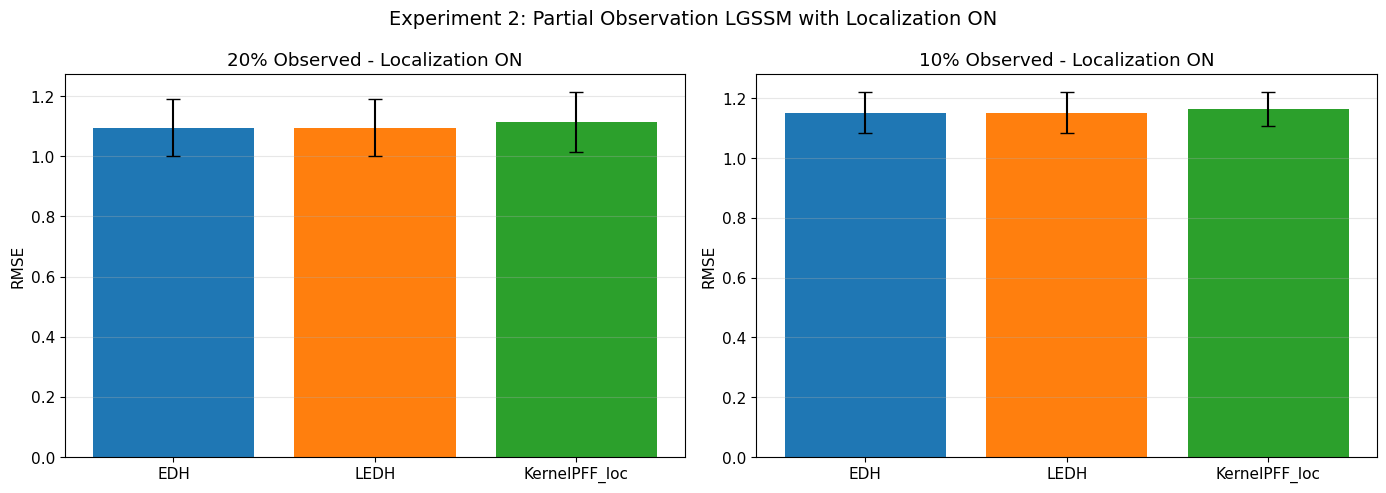

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax_idx, (obs_pct, results) in enumerate(results_exp2.items()):
    names = list(results.keys())
    x = np.arange(len(names))
    rmses = [results[n].rmse_mean for n in names]
    rmse_stds = [results[n].rmse_std for n in names]
    colors = [COLORS.get(n, 'gray') for n in names]
    
    axes[ax_idx].bar(x, rmses, yerr=rmse_stds, color=colors, capsize=5)
    axes[ax_idx].set_xticks(x)
    axes[ax_idx].set_xticklabels(names)
    axes[ax_idx].set_ylabel('RMSE')
    axes[ax_idx].set_title(f'{obs_pct} Observed - Localization ON')
    axes[ax_idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Experiment 2: Partial Observation LGSSM with Localization ON', fontsize=14)
plt.tight_layout()
plt.show()

## Experiment 3: Partial Observation with Localization OFF

**Setup**: 20D state, 20% and 10% observed, Kernel PFF WITHOUT localization

**Expected**: Kernel PFF loses — diagonal kernel cannot communicate observed↔unobserved

In [9]:
results_exp3 = run_experiment_3(n_particles=40, T=20, n_trajectories=5, seed=42)


EXPERIMENT 3: Partial Observation LGSSM - Localization OFF
Expected: Kernel PFF loses (no communication)

--- 20% observed (4/20) ---
  Trajectory 1/5 - Done
  Trajectory 2/5 - Done
  Trajectory 3/5 - Done
  Trajectory 4/5 - Done
  Trajectory 5/5 - Done

Experiment 3: 20% Observed - Localization OFF
Filter                    |             RMSE |        Runtime
----------------------------------------------------------------------
EDH                       | 1.0954 ± 0.0959 | 0.024 ± 0.000s
LEDH                      | 1.0954 ± 0.0959 | 0.880 ± 0.013s
KernelPFF_no_loc          | 1.1749 ± 0.0929 | 0.816 ± 0.005s

--- 10% observed (2/20) ---
  Trajectory 1/5 - Done
  Trajectory 2/5 - Done
  Trajectory 3/5 - Done
  Trajectory 4/5 - Done
  Trajectory 5/5 - Done

Experiment 3: 10% Observed - Localization OFF
Filter                    |             RMSE |        Runtime
----------------------------------------------------------------------
EDH                       | 1.1522 ± 0.0684 | 0.023 ±

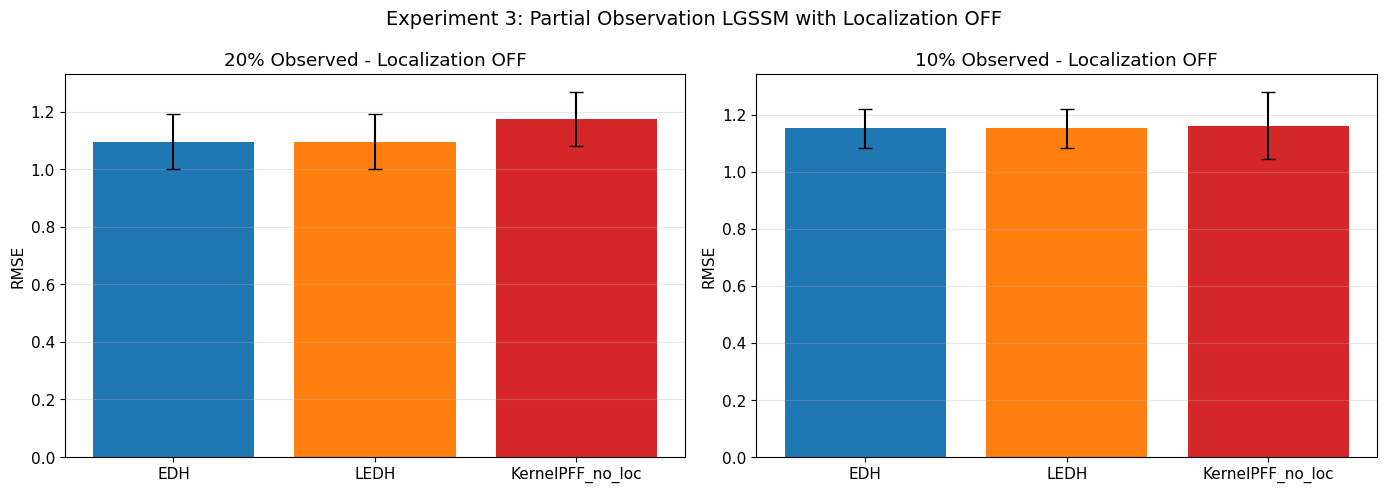

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax_idx, (obs_pct, results) in enumerate(results_exp3.items()):
    names = list(results.keys())
    x = np.arange(len(names))
    rmses = [results[n].rmse_mean for n in names]
    rmse_stds = [results[n].rmse_std for n in names]
    colors = [COLORS.get(n, 'gray') for n in names]
    
    axes[ax_idx].bar(x, rmses, yerr=rmse_stds, color=colors, capsize=5)
    axes[ax_idx].set_xticks(x)
    axes[ax_idx].set_xticklabels(names)
    axes[ax_idx].set_ylabel('RMSE')
    axes[ax_idx].set_title(f'{obs_pct} Observed - Localization OFF')
    axes[ax_idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Experiment 3: Partial Observation LGSSM with Localization OFF', fontsize=14)
plt.tight_layout()
plt.show()

## Compare Experiments 2 vs 3: Effect of Localization

In [11]:
# Summary comparison
print("\nEffect of Localization on Kernel PFF:")
print("=" * 60)
print(f"{'Observation':<15} | {'With Loc (RMSE)':<18} | {'Without Loc (RMSE)':<18}")
print("-" * 60)

for obs_pct in ['20%', '10%']:
    rmse_loc = results_exp2[obs_pct]['KernelPFF_loc'].rmse_mean
    rmse_no_loc = results_exp3[obs_pct]['KernelPFF_no_loc'].rmse_mean
    print(f"{obs_pct:<15} | {rmse_loc:<18.4f} | {rmse_no_loc:<18.4f}")

print("=" * 60)


Effect of Localization on Kernel PFF:
Observation     | With Loc (RMSE)    | Without Loc (RMSE)
------------------------------------------------------------
20%             | 1.1145             | 1.1749            
10%             | 1.1637             | 1.1619            


## Experiment 4: Range-Bearing with Localization ON

**Setup**: 4D state (position + velocity), 2D observation (range, bearing) — nonlinear

**Expected**: Unclear

In [12]:
results_exp4 = run_experiment_4(n_particles=40, T=30, n_trajectories=10, seed=42)


EXPERIMENT 4: Range-Bearing (Nonlinear) - Localization ON
  Trajectory 1/10 - Done
  Trajectory 2/10 - Done
  Trajectory 3/10 - Done
  Trajectory 4/10 - Done
  Trajectory 5/10 - Done
  Trajectory 6/10 - Done
  Trajectory 7/10 - Done
  Trajectory 8/10 - Done
  Trajectory 9/10 - Done
  Trajectory 10/10 - Done

Experiment 4: Range-Bearing - Localization ON
Filter                    |             RMSE |        Runtime |    FlowMag |       κ(A)
----------------------------------------------------------------------
EDH                       | 0.3435 ± 0.0826 | 0.048 ± 0.001s |     0.0124 |       1.03
LEDH                      | 0.3395 ± 0.0809 | 1.322 ± 0.016s |     0.0126 |       1.03
KernelPFF_loc             | 0.3783 ± 0.0958 | 1.400 ± 0.010s |   167.3519 |      98.46


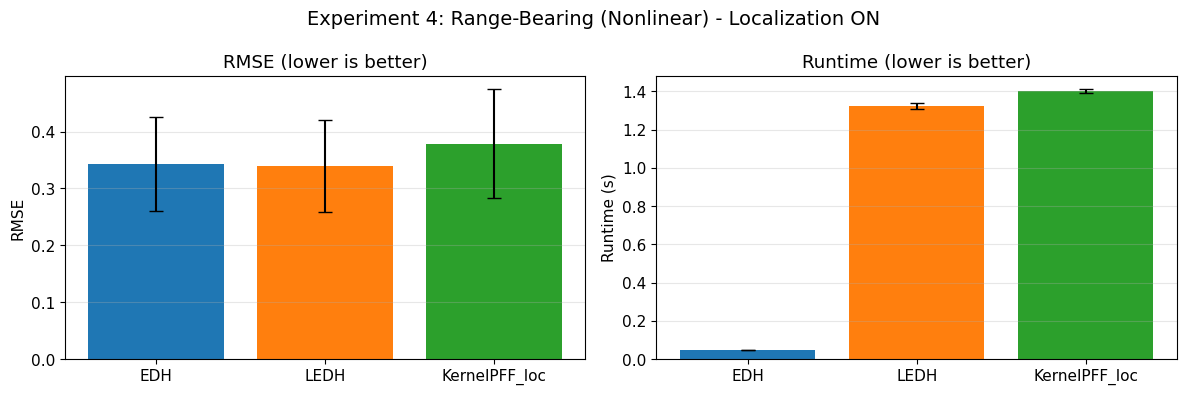

In [13]:
plot_rmse_runtime(results_exp4, "Experiment 4: Range-Bearing (Nonlinear) - Localization ON")

In [14]:
# One can check the performance of Kernel PFF increases as the number of particles increases (B estimate precision).
# results_exp4 = run_experiment_4(n_particles=10, T=30, n_trajectories=10, seed=42)

## Experiment 5: Range-Bearing with Localization OFF

**Setup**: Same as Experiment 4, but Kernel PFF WITHOUT localization

**Expected**: Kernel PFF loses — poor stability without localization

In [15]:
results_exp5 = run_experiment_5(n_particles=40, T=30, n_trajectories=10, seed=42)


EXPERIMENT 5: Range-Bearing (Nonlinear) - Localization OFF
Expected: Kernel PFF loses (poor stability)
  Trajectory 1/10 - Done
  Trajectory 2/10 - Done
  Trajectory 3/10 - Done
  Trajectory 4/10 - Done
  Trajectory 5/10 - Done
  Trajectory 6/10 - Done
  Trajectory 7/10 - Done
  Trajectory 8/10 - Done
  Trajectory 9/10 - Done
  Trajectory 10/10 - Done

Experiment 5: Range-Bearing - Localization OFF
Filter                    |             RMSE |        Runtime |    FlowMag |       κ(A)
----------------------------------------------------------------------
EDH                       | 0.3435 ± 0.0826 | 0.048 ± 0.001s |     0.0124 |       1.03
LEDH                      | 0.3395 ± 0.0809 | 1.315 ± 0.008s |     0.0126 |       1.03
KernelPFF_no_loc          | 0.3939 ± 0.1049 | 1.411 ± 0.028s |   167.3519 |      98.46


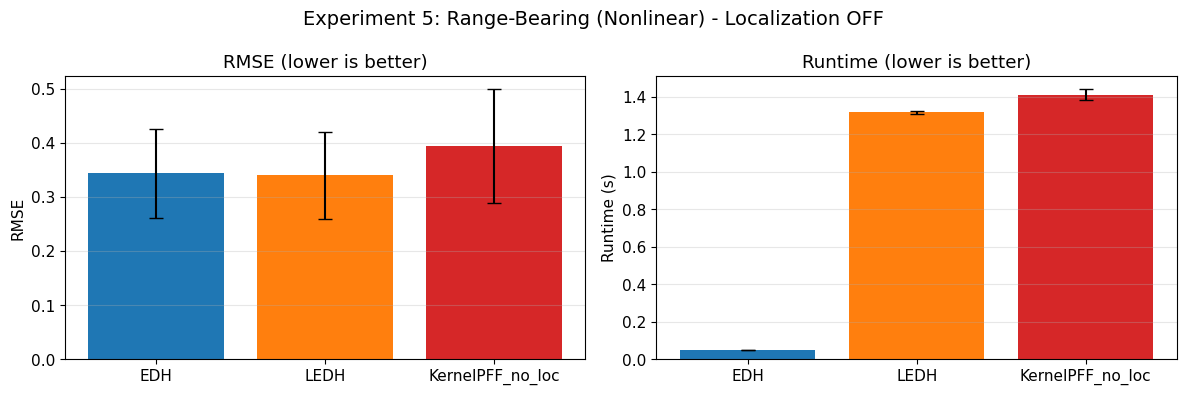

In [16]:
plot_rmse_runtime(results_exp5, "Experiment 5: Range-Bearing (Nonlinear) - Localization OFF")

## Compare Experiments 4 vs 5: Effect of Localization on Nonlinear Model

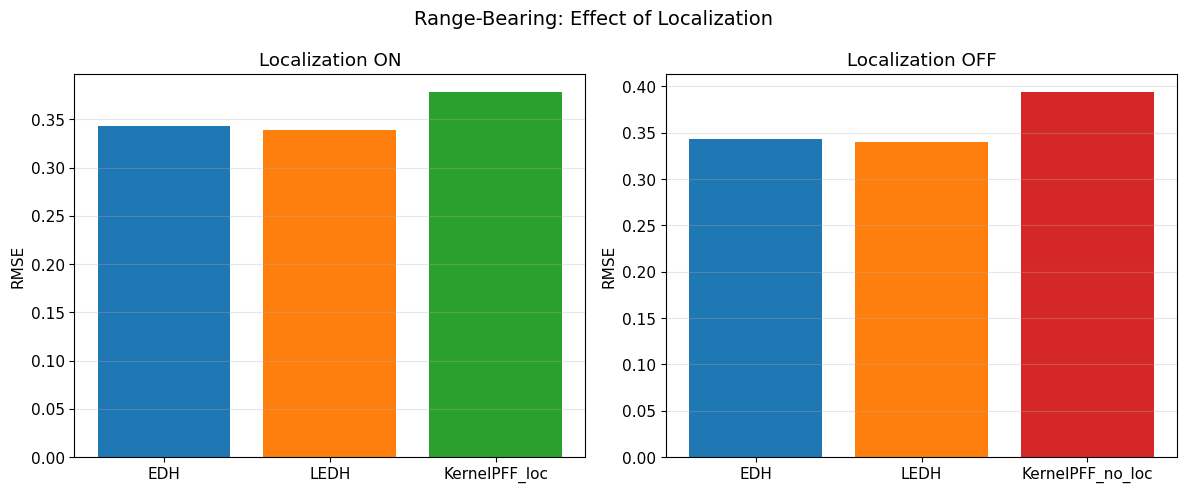

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Experiment 4: With localization
names4 = list(results_exp4.keys())
x4 = np.arange(len(names4))
rmses4 = [results_exp4[n].rmse_mean for n in names4]
colors4 = [COLORS.get(n, 'gray') for n in names4]
axes[0].bar(x4, rmses4, color=colors4)
axes[0].set_xticks(x4)
axes[0].set_xticklabels(names4)
axes[0].set_ylabel('RMSE')
axes[0].set_title('Localization ON')
axes[0].grid(True, alpha=0.3, axis='y')

# Experiment 5: Without localization
names5 = list(results_exp5.keys())
x5 = np.arange(len(names5))
rmses5 = [results_exp5[n].rmse_mean for n in names5]
colors5 = [COLORS.get(n, 'gray') for n in names5]
axes[1].bar(x5, rmses5, color=colors5)
axes[1].set_xticks(x5)
axes[1].set_xticklabels(names5)
axes[1].set_ylabel('RMSE')
axes[1].set_title('Localization OFF')
axes[1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Range-Bearing: Effect of Localization', fontsize=14)
plt.tight_layout()
plt.show()

## Summary Table

In [18]:
# Create summary DataFrame
summary_data = []

# Exp 1
for name, res in results_exp1.items():
    summary_data.append({
        'Experiment': '1: Full Obs LGSSM',
        'Filter': name,
        'RMSE': f"{res.rmse_mean:.4f} ± {res.rmse_std:.4f}",
        'Runtime (s)': f"{res.runtime_mean:.3f}",
    })

# Exp 2
for obs_pct, results in results_exp2.items():
    for name, res in results.items():
        summary_data.append({
            'Experiment': f'2: {obs_pct} Obs, Loc ON',
            'Filter': name,
            'RMSE': f"{res.rmse_mean:.4f} ± {res.rmse_std:.4f}",
            'Runtime (s)': f"{res.runtime_mean:.3f}",
        })

# Exp 3
for obs_pct, results in results_exp3.items():
    for name, res in results.items():
        summary_data.append({
            'Experiment': f'3: {obs_pct} Obs, Loc OFF',
            'Filter': name,
            'RMSE': f"{res.rmse_mean:.4f} ± {res.rmse_std:.4f}",
            'Runtime (s)': f"{res.runtime_mean:.3f}",
        })

# Exp 4
for name, res in results_exp4.items():
    summary_data.append({
        'Experiment': '4: Range-Bearing, Loc ON',
        'Filter': name,
        'RMSE': f"{res.rmse_mean:.4f} ± {res.rmse_std:.4f}",
        'Runtime (s)': f"{res.runtime_mean:.3f}",
    })

# Exp 5
for name, res in results_exp5.items():
    summary_data.append({
        'Experiment': '5: Range-Bearing, Loc OFF',
        'Filter': name,
        'RMSE': f"{res.rmse_mean:.4f} ± {res.rmse_std:.4f}",
        'Runtime (s)': f"{res.runtime_mean:.3f}",
    })

df = pd.DataFrame(summary_data)
df

,Experiment,Filter,RMSE,Runtime (s)
0,1: Full Obs LGSSM,EDH,0.2782 ± 0.0172,0.034
1,1: Full Obs LGSSM,LEDH,0.2766 ± 0.0167,1.157
2,1: Full Obs LGSSM,KernelPFF_loc,0.2810 ± 0.0162,0.886
3,"2: 20% Obs, Loc ON",EDH,1.0954 ± 0.0959,0.024
4,"2: 20% Obs, Loc ON",LEDH,1.0954 ± 0.0959,0.882
5,"2: 20% Obs, Loc ON",KernelPFF_loc,1.1145 ± 0.0989,0.815
6,"2: 10% Obs, Loc ON",EDH,1.1522 ± 0.0684,0.023
7,"2: 10% Obs, Loc ON",LEDH,1.1522 ± 0.0684,0.864
8,"2: 10% Obs, Loc ON",KernelPFF_loc,1.1637 ± 0.0558,0.829
9,"3: 20% Obs, Loc OFF",EDH,1.0954 ± 0.0959,0.024


## Conclusions

Based on the experiments:

1. **Full observation LGSSM**: EDH/LEDH are exact for linear Gaussian, as expected.

2. **Partial observation with localization ON**: Localization helps Kernel PFF by enabling communication between observed and unobserved states through $B \circ C$.

3. **Partial observation with localization OFF**: Kernel PFF struggles because the diagonal kernel has no mechanism for observed↔unobserved communication.

4. **Range-Bearing (nonlinear)**: The nonlinear case tests whether Kernel PFF's flexibility helps. Results depend on localization.

5. **Key insight**: The localization (Eqs. 28-29 in Hu 2021) is doing the heavy lifting, not the matrix kernel itself.